In [1]:
import os
import pandas as pd
from PIL import Image

# Set a higher limit for decompression
Image.MAX_IMAGE_PIXELS = None

# Define the directory path
directory_path = '/root/ubc_ocean/WSI cancer masks'

# Initialize empty lists to store file names, paths, widths, and heights
file_names = []
file_paths = []
mask_widths = []
mask_heights = []

# List all files in the directory
for root, dirs, files in os.walk(directory_path):
    for file in files:
        # Get the full path of the file
        file_path = os.path.join(root, file)
        
        # Remove the ".png" extension and use the base name as image_id
        image_id = os.path.splitext(file)[0]
        
        # Append the image_id and file path to the lists
        file_names.append(image_id)
        file_paths.append(file_path)

        # Open the image using PIL and get its dimensions
        image = Image.open(file_path)
        width, height = image.size
        mask_widths.append(width)
        mask_heights.append(height)

# Create a DataFrame
masks = pd.DataFrame({'image_id': file_names, 'mask_path': file_paths, 'mask_width': mask_widths, 'mask_height': mask_heights})

# Print the DataFrame
masks

,image_id,mask_path,mask_width,mask_height
0,10143,/root/ubc_ocean/WSI cancer masks/10143.png,40063,42207
1,16986,/root/ubc_ocean/WSI cancer masks/16986.png,33547,28025
2,36063,/root/ubc_ocean/WSI cancer masks/36063.png,65725,32732
3,39466,/root/ubc_ocean/WSI cancer masks/39466.png,45103,29828
4,46139,/root/ubc_ocean/WSI cancer masks/46139.png,33347,24842
...,...,...,...,...
147,38019,/root/ubc_ocean/WSI cancer masks/38019.png,59023,43223
148,17174,/root/ubc_ocean/WSI cancer masks/17174.png,31644,29109
149,6281,/root/ubc_ocean/WSI cancer masks/6281.png,50970,43763
150,43815,/root/ubc_ocean/WSI cancer masks/43815.png,38935,39255


In [ ]:
train = pd.read_csv("/root/ubc/train.csv")

masks['image_id'] = masks['image_id'].astype(int)
masked_train = pd.merge(train, masks, on='image_id', how='inner')
masked_train['path'] = '/root/UBC-OCEAN.zip/train_images/' + masked_train['image_id'].astype(str) + '.png'
masked_train.drop(columns=['is_tma'], inplace=True)
masked_train

,image_id,label,image_width,image_height,mask_path,mask_width,mask_height,path
0,66,LGSC,48871,48195,/root/ubc_ocean/WSI cancer masks/66.png,48871,48195,/root/UBC-OCEAN.zip/train_images/66.png
1,1020,HGSC,36585,33751,/root/ubc_ocean/WSI cancer masks/1020.png,36585,33751,/root/UBC-OCEAN.zip/train_images/1020.png
2,1101,HGSC,26306,18403,/root/ubc_ocean/WSI cancer masks/1101.png,26306,18403,/root/UBC-OCEAN.zip/train_images/1101.png
3,1252,HGSC,60420,27480,/root/ubc_ocean/WSI cancer masks/1252.png,60420,27480,/root/UBC-OCEAN.zip/train_images/1252.png
4,1925,HGSC,44847,32951,/root/ubc_ocean/WSI cancer masks/1925.png,44847,32951,/root/UBC-OCEAN.zip/train_images/1925.png
...,...,...,...,...,...,...,...,...
147,63165,CC,30342,12783,/root/ubc_ocean/WSI cancer masks/63165.png,38560,30103,/root/UBC-OCEAN.zip/train_images/63165.png
148,63941,HGSC,47123,36600,/root/ubc_ocean/WSI cancer masks/63941.png,47123,36600,/root/UBC-OCEAN.zip/train_images/63941.png
149,65022,LGSC,53355,46675,/root/ubc_ocean/WSI cancer masks/65022.png,53355,46675,/root/UBC-OCEAN.zip/train_images/65022.png
150,65094,MC,55042,45080,/root/ubc_ocean/WSI cancer masks/65094.png,55042,45080,/root/UBC-OCEAN.zip/train_images/65094.png


In [ ]:
# Filter rows where image_width is not equal to mask_width or image_height is not equal to mask_height
mismatched_dimensions = masked_train[
    (masked_train['image_width'] != masked_train['mask_width']) |
    (masked_train['image_height'] != masked_train['mask_height'])
]

# Extract the 'image_id' values where dimensions don't match
mismatched_image_ids = mismatched_dimensions['image_id'].values

len(mismatched_image_ids)

18

In [ ]:
# Filter rows where image_id is not in the mismatched_image_ids array
masked_train = masked_train[~masked_train['image_id'].isin(mismatched_image_ids)]
masked_train

,image_id,label,image_width,image_height,mask_path,mask_width,mask_height,path
0,66,LGSC,48871,48195,/root/ubc_ocean/WSI cancer masks/66.png,48871,48195,/root/UBC-OCEAN.zip/train_images/66.png
1,1020,HGSC,36585,33751,/root/ubc_ocean/WSI cancer masks/1020.png,36585,33751,/root/UBC-OCEAN.zip/train_images/1020.png
2,1101,HGSC,26306,18403,/root/ubc_ocean/WSI cancer masks/1101.png,26306,18403,/root/UBC-OCEAN.zip/train_images/1101.png
3,1252,HGSC,60420,27480,/root/ubc_ocean/WSI cancer masks/1252.png,60420,27480,/root/UBC-OCEAN.zip/train_images/1252.png
4,1925,HGSC,44847,32951,/root/ubc_ocean/WSI cancer masks/1925.png,44847,32951,/root/UBC-OCEAN.zip/train_images/1925.png
...,...,...,...,...,...,...,...,...
146,63121,EC,53469,44300,/root/ubc_ocean/WSI cancer masks/63121.png,53469,44300,/root/UBC-OCEAN.zip/train_images/63121.png
148,63941,HGSC,47123,36600,/root/ubc_ocean/WSI cancer masks/63941.png,47123,36600,/root/UBC-OCEAN.zip/train_images/63941.png
149,65022,LGSC,53355,46675,/root/ubc_ocean/WSI cancer masks/65022.png,53355,46675,/root/UBC-OCEAN.zip/train_images/65022.png
150,65094,MC,55042,45080,/root/ubc_ocean/WSI cancer masks/65094.png,55042,45080,/root/UBC-OCEAN.zip/train_images/65094.png


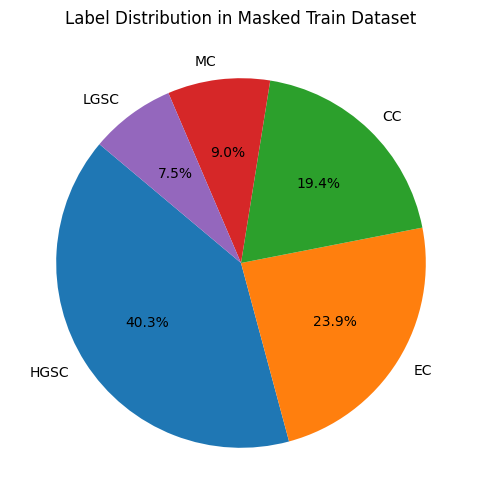

In [ ]:
import matplotlib.pyplot as plt

# Counting the frequency of each label
label_counts = masked_train['label'].value_counts()

# Creating a pie chart
plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Label Distribution in Masked Train Dataset')
plt.show()

### This section segments cancerous regions on the original WSI images

In [ ]:
import torch
from torchvision import transforms
from PIL import Image
import os
import zipfile

# Adjust these paths as necessary
mask_dir = '/root/ubc_ocean/WSI cancer masks/'
zip_path = '/root/UBC-OCEAN.zip'
temp_dir = '/root/ubc_ocean/temp'
output_dir = '/root/ubc_ocean/anar/WSI masked cancerous regions/'

# Ensure temp and output directories exist
os.makedirs(temp_dir, exist_ok=True)
os.makedirs(output_dir, exist_ok=True)

# Device configuration - use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def process_and_resize_mask(mask_path, original_path, resize_dims, image_id):
    try:
        # Load the mask and the original image
        mask = Image.open(mask_path).convert('RGBA')
        original = Image.open(original_path).convert('RGBA')
        
        # Transform PIL images to PyTorch tensors
        transform = transforms.Compose([
            transforms.Resize(resize_dims),
            transforms.ToTensor(),
        ])
        
        mask = transform(mask).to(device)
        original = transform(original).to(device)
        
       
        r = mask[0:1]  
        g = torch.zeros_like(r)  
        b = torch.zeros_like(r)  
        a = mask[3:4] * 0.5  # reducing opacity to 50%
        
        # Combining the channels back
        mask = torch.cat((r, g, b, a), 0)
        
        # Overlaying the mask on the original image
        combined = original * (1 - mask) + mask * mask
        
        # Convert back to PIL Image
        combined = transforms.ToPILImage()(combined.cpu())
        return combined
    except Exception as e:
        print(f"Failed to process images for {image_id}: {e}")
        return None


def extract_and_process_images_from_df(masked_train, zip_path, temp_dir, output_dir):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        for index, row in masked_train.iterrows():
            mask_path = row['mask_path']
            original_image_path = row['path']
            
            image_id = row['image_id']
            image_path_within_zip = f'train_images/{image_id}.png'
            
            try:
                zip_ref.extract(image_path_within_zip, temp_dir)
                original_path = os.path.join(temp_dir, 'train_images', f"{image_id}.png")
                
                result_image = process_and_resize_mask(mask_path, original_path, (1024, 1024), image_id)
                if result_image is not None:
                    output_path = os.path.join(output_dir, f"{image_id}.png")
                    result_image.save(output_path)
                    print(f"Image saved to {output_path}")
                
                # Clean up the temp image
                os.remove(original_path)
                
            except KeyError:
                print(f"No corresponding image found in ZIP for {image_id}")
            except Exception as e:
                print(f"Error processing {image_id}: {e}")

# Assuming 'masked_train' is a pandas DataFrame loaded previously
extract_and_process_images_from_df(masked_train, zip_path, temp_dir, output_dir)

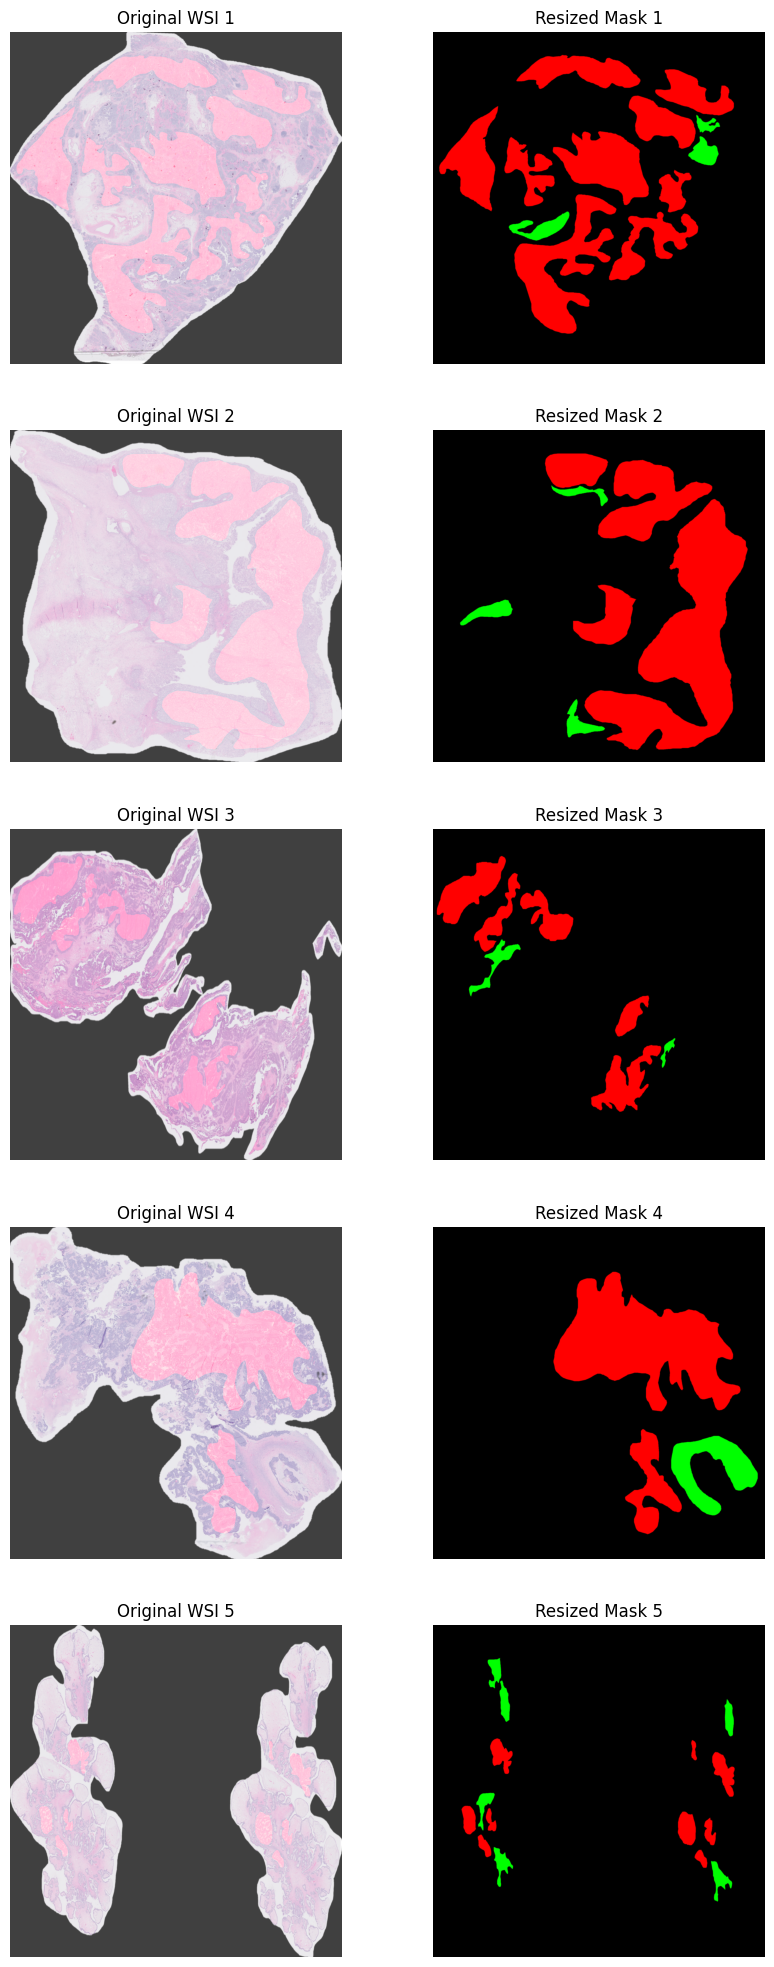

In [6]:
from PIL import Image
import matplotlib.pyplot as plt
import os
import random

# Paths to your directories
wsi_directory = "/root/ubc_ocean/anar/WSI masked cancerous regions"
mask_directory = "/root/ubc_ocean/WSI cancer masks"

# List files in both directories
wsi_files = os.listdir(wsi_directory)
mask_files = os.listdir(mask_directory)

# Match pairs by image_id
pairs = []  # Store tuples of (wsi_path, mask_path)
for wsi_file in wsi_files:
    # Extract image_id from the filename, adjust according to your naming convention
    image_id = wsi_file.split('_')[0]  # Example: Assuming the ID is before an underscore
    corresponding_mask = [m for m in mask_files if m.startswith(image_id)]
    if corresponding_mask:
        pairs.append((os.path.join(wsi_directory, wsi_file), os.path.join(mask_directory, corresponding_mask[0])))

# Randomly select 5 pairs
selected_pairs = random.sample(pairs, min(5, len(pairs)))  # Ensures we don't exceed the number of available pairs

plt.figure(figsize=(10, 5 * len(selected_pairs)))  # Adjust figure size dynamically based on number of pairs

for i, (wsi_path, mask_path) in enumerate(selected_pairs):
    # Load the images
    wsi_image = Image.open(wsi_path)
    mask_image = Image.open(mask_path)

    # Resize mask to match WSI dimensions
    mask_image_resized = mask_image.resize(wsi_image.size)

    # Display WSI
    plt.subplot(len(selected_pairs), 2, 2*i+1)
    plt.imshow(wsi_image)
    plt.title(f'Original WSI {i+1}')
    plt.axis('off')

    # Display Resized Mask
    plt.subplot(len(selected_pairs), 2, 2*i+2)
    plt.imshow(mask_image_resized)
    plt.title(f'Resized Mask {i+1}')
    plt.axis('off')

plt.show()